In [1]:
import math
import numpy as np
import matplotlib.pyplot as plt

# Naive Implementation of Ground Truth U


### Schrödinger's Equation

The rate of change of U can be given by,

$$\dot{U}(t) = -iH(t)U(t) $$


We want to find the value of U after time t has passed in the quantum simulation. We can integrate to get Schrödinger's equation,

$$ U(t + dt) = (I - iH(t + dt)dt)U(t) $$

By assuming dt is small, we can remove it entire from the H(t + dt) term. Or, for the purposes of Euler integration, we can use the equation,

$$ U(t + dt) = (I - iH(t + \frac{1}{2}dt)dt)U(t) $$


In [9]:
# We wish to calculate the state of the system after some time T
T = 50

# We choose a small value of dt, for a fine grained simulation of the system's evolution over time
# needs to be << than the standard deviation of v(t)
dt = 0.01

# Ht can be defined in any way, here we use H(t) = E_0 I + v(t) sigma_x
# specifically we use E_0 = 1 and v(t) = 0.5e^(-(t-2.5)^2)
def get_Ht(t):
    E_0 = 1
    v_t = 0.5*math.exp(-(t-2.5)**2)
    
    sigma_x = np.matrix([[0 + 0j,1 + 0j], [1 + 0j,0 + 0j]])
    
    return E_0*np.eye(2, dtype = complex) + v_t*sigma_x
    

In [10]:
'''
    Get the value of U after timestep dt using H at (t+dt) and the current value of U
'''
def get_U_tplusdt(t, dt, U_t):
    I = np.eye(2, dtype = complex)
    i = complex(0, 1)
    return np.matmul(I - i*get_Ht(t + 0.5*dt)*dt, U_t)

In [11]:
def naive_simulation(T, dt):
    t = 0
    # U_0 is always I
    U_t = np.eye(2, dtype = complex)
    
    while (t<T):
        U_t = get_U_tplusdt(t, dt, U_t)
        t += dt
        
    return U_t

In [16]:
matrix = naive_simulation(T, dt)

In [ ]:
np.matmul(matrix, np.conj(matrix).T)

### Plotting v(t)

For this instance we use v(t) = $0.5e^{-(t-2.5)^{2}}$

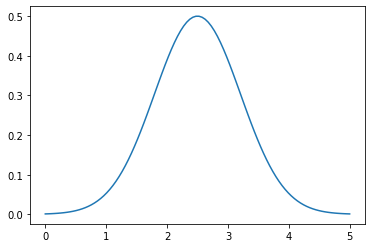

In [13]:
x = np.linspace(0, 5, 100)

def v(t):
    return 0.5*math.exp(-(t-2.5)**2)

v_vect = np.vectorize(v)
y = v_vect(x)

plt.plot(x, y)

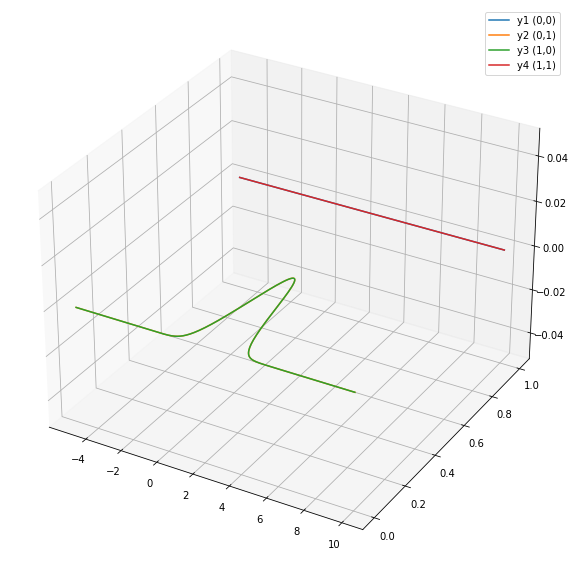

In [14]:
# To understand how H(t) changes over time, we can plot the individual positions of the matrix,
# since they are independent of each other

x = np.linspace(-5, 10, 300)
y = [get_Ht(t) for t in x]

y1 = [y[i][0,0] for i in range(len(y))]
y2 = [y[i][0,1] for i in range(len(y))]
y3 = [y[i][1,0] for i in range(len(y))]
y4 = [y[i][1,1] for i in range(len(y))]

fig = plt.figure(figsize=(10,20))
ax = plt.axes(projection ='3d')

y1r = [y1[i].real for i in range(len(y1))]
y1i = [y1[i].imag for i in range(len(y1))]
y2r = [y2[i].real for i in range(len(y2))]
y2i = [y2[i].imag for i in range(len(y2))]
y3r = [y3[i].real for i in range(len(y3))]
y3i = [y3[i].imag for i in range(len(y3))]
y4r = [y4[i].real for i in range(len(y4))]
y4i = [y4[i].imag for i in range(len(y4))]

ax.plot(x, y1r, y1i, label = "y1 (0,0)")
ax.plot(x, y2r, y2i, label = "y2 (0,1)")
ax.plot(x, y3r, y3i, label = "y3 (1,0)")
ax.plot(x, y4r, y4i, label = "y4 (1,1)")
ax.legend()

# (0,0) and (1,1) are along the straight line, (0,1) and (1,0) experience the curve of v(t)


Text(0.5, 0, 'complex')

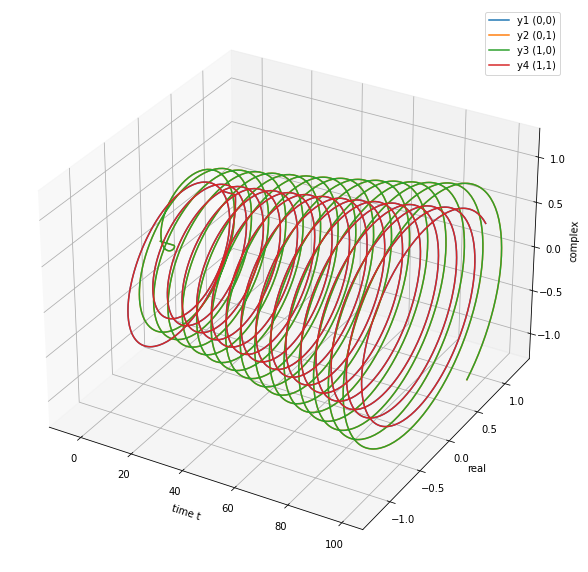

In [15]:
# attempting to plot how U(t) changes over time 
# To understand how H(t) changes over time, we can plot the individual positions of the matrix,
# since they are independent of each other

x = np.linspace(-5, 100, 3000)
y = [naive_simulation(t, dt) for t in x]

y1 = [y[i][0,0] for i in range(len(y))]
y2 = [y[i][0,1] for i in range(len(y))]
y3 = [y[i][1,0] for i in range(len(y))]
y4 = [y[i][1,1] for i in range(len(y))]

fig = plt.figure(figsize=(10,20))
ax = plt.axes(projection ='3d')

y1r = [y1[i].real for i in range(len(y1))]
y1i = [y1[i].imag for i in range(len(y1))]
y2r = [y2[i].real for i in range(len(y2))]
y2i = [y2[i].imag for i in range(len(y2))]
y3r = [y3[i].real for i in range(len(y3))]
y3i = [y3[i].imag for i in range(len(y3))]
y4r = [y4[i].real for i in range(len(y4))]
y4i = [y4[i].imag for i in range(len(y4))]

ax.plot(x, y1r, y1i, label = "y1 (0,0)")
ax.plot(x, y2r, y2i, label = "y2 (0,1)")
ax.plot(x, y3r, y3i, label = "y3 (1,0)")
ax.plot(x, y4r, y4i, label = "y4 (1,1)")
ax.legend()
ax.set_xlabel("time t")
ax.set_ylabel("real")
ax.set_zlabel("complex")

# (0,0) and (1,1) are along the straight line, (0,1) and (1,0) experience the curve of v(t)

Text(0.5, 0, 'complex')

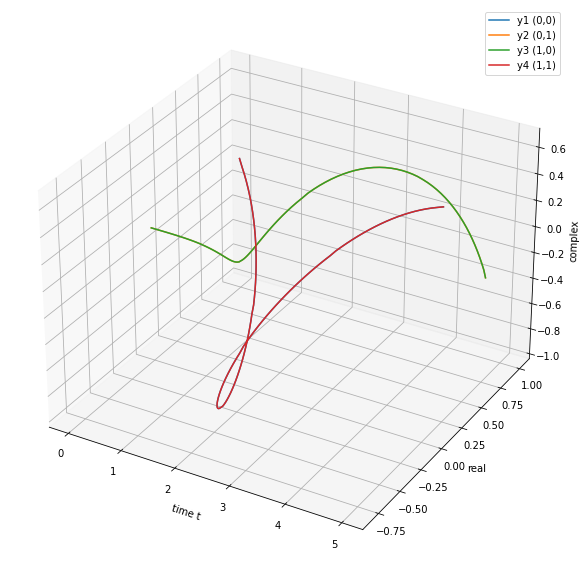

In [17]:
x = np.linspace(-0, 5, 100)
y = [naive_simulation(t, dt) for t in x]

y1 = [y[i][0,0] for i in range(len(y))]
y2 = [y[i][0,1] for i in range(len(y))]
y3 = [y[i][1,0] for i in range(len(y))]
y4 = [y[i][1,1] for i in range(len(y))]

fig = plt.figure(figsize=(10,20))
ax = plt.axes(projection ='3d')

y1r = [y1[i].real for i in range(len(y1))]
y1i = [y1[i].imag for i in range(len(y1))]
y2r = [y2[i].real for i in range(len(y2))]
y2i = [y2[i].imag for i in range(len(y2))]
y3r = [y3[i].real for i in range(len(y3))]
y3i = [y3[i].imag for i in range(len(y3))]
y4r = [y4[i].real for i in range(len(y4))]
y4i = [y4[i].imag for i in range(len(y4))]

ax.plot(x, y1r, y1i, label = "y1 (0,0)")
ax.plot(x, y2r, y2i, label = "y2 (0,1)")
ax.plot(x, y3r, y3i, label = "y3 (1,0)")
ax.plot(x, y4r, y4i, label = "y4 (1,1)")
ax.legend()
ax.set_xlabel("time t")
ax.set_ylabel("real")
ax.set_zlabel("complex")